In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
J = lambda x,y : 3*x**2+3*y**2-2*x*y-3*x-7*y+9
f1 = lambda x,y : x**2+y**2-1
f2 = lambda x,y : 2*x-1 
dJ = lambda x,y : np.array([6*x-2*y-3, 6*y-2*x-7])
df1 = lambda x,y : np.array([2*x, 2*y])
df2 = lambda x,y : np.array([2,0])

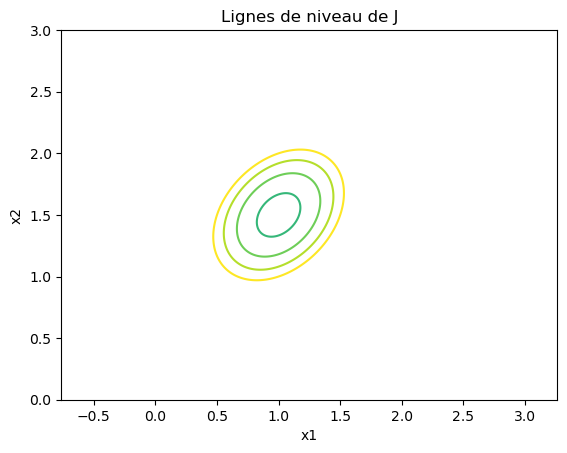

In [3]:
def level_lines(f, xmin, xmax, ymin, ymax, levels, N=500):
    x = np.linspace(xmin, xmax, N)
    y = np.linspace(ymin, ymax, N)
    z = f(*np.meshgrid(x, y))
    level_l = plt.contour(x, y, z, levels=levels)
    #plt.clabel(level_l, levels, fmt='%.1f') 
    
level_lines(J, 0, 2.5, 0, 3, np.linspace(1, 3, 10))
plt.ylabel("x2")
plt.xlabel("x1")
plt.title("Lignes de niveau de J")
plt.axis('equal')
plt.show()

In [4]:
lambda0 = np.array([1, 1])
x0 = np.array([1, 1])
x_new0 =  np.array([0, 0])
pi = lambda l,alpha,f,x,y : (l+alpha*f(x,y)>0)*(l+alpha*f(x,y))

In [5]:
def uzawa(J, f1, f2, dJ, df1, df2, alpha, eps, n_itermax) :
    Lambda = lambda0
    X = []
    k = 0
    x = x0
    x_new =  x_new0
    while np.linalg.norm(x_new-x) > eps and k <= n_itermax :
        x = x_new
        x_new = np.linalg.inv(np.array([[6+2*Lambda[0],-2],[-2,6+2*Lambda[0]]]))@np.array([3-2*Lambda[1],7])
        X.append(x_new)
        Lambda = np.array([pi(Lambda[0],alpha,f1,x_new[0],x_new[1]),pi(Lambda[1],alpha,f2,x_new[0],x_new[1])])
        k+=1
    X = np.array(X)
    return X
    

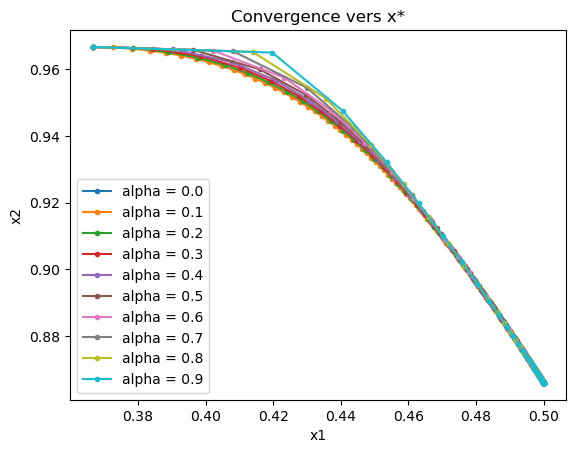

In [6]:
alpha = [0.1*i for i in range (10)]
for a in alpha :
    X = uzawa(J, f1, f2, dJ, df1, df2, a, 1e-10, 100)
    plt.title('Convergence vers x*')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.plot(X[:,0],X[:,1],'.',linestyle='-', label='alpha = %s' % str(a)[:3])
    plt.legend()

Notre algorithme d'Uzawa converge assez rapidement vers x*, et ce peu importe le taux d'apprentissage choisi. En une centaine d'itérations, le résultat obtenu est déjà satisfaisant.